In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import re
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import nbformat
import joblib



In [2]:
df = pd.read_csv("sentiment.csv")
df.head()

,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [3]:
df.shape

(732, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 732 non-null    int64 
 1   Text               732 non-null    object
 2   Sentiment (Label)  732 non-null    object
 3   Timestamp          732 non-null    object
 4   User               732 non-null    object
 5   Source             732 non-null    object
 6   Topic              732 non-null    object
 7   Retweets           732 non-null    int64 
 8   Likes              732 non-null    int64 
 9   Country            732 non-null    object
 10  Year               732 non-null    int64 
 11  Month              732 non-null    int64 
 12  Day                732 non-null    int64 
 13  Hour               732 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 80.2+ KB


In [5]:
df.isnull().sum()

ID                   0
Text                 0
Sentiment (Label)    0
Timestamp            0
User                 0
Source               0
Topic                0
Retweets             0
Likes                0
Country              0
Year                 0
Month                0
Day                  0
Hour                 0
dtype: int64

In [6]:
df.describe()

,ID,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [7]:
df.columns

Index(['ID', 'Text', 'Sentiment (Label)', 'Timestamp', 'User', 'Source',
       'Topic', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [8]:
df.drop(['Timestamp','ID'],axis = 1, inplace=True)
df.head()

,Text,Sentiment (Label),User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [9]:
df['Sentiment (Label)'].nunique()

279

In [10]:
df['Source'].unique()

array([' Twitter  ', ' Instagram ', ' Facebook ', ' Twitter '],
      dtype=object)

In [11]:
df[df.duplicated()].head()

,Text,Sentiment (Label),User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
279,"Proudly scaling the peaks of achievement, a m...",Proud,PeakConqueror,Twitter,#Proud #ScalingPeaks,23,46,USA,2020,1,5,8
280,"Embraced by the hopeful dawn, a gardener sowi...",Hopeful,DawnGardener,Instagram,#Hopeful #SeedsOfOptimism,14,28,UK,2022,7,17,6
281,"A playful escapade in the carnival of life, c...",Playful,CarnivalDreamer,Facebook,#Playful #CarnivalEscapade,24,48,Australia,2018,8,22,17
282,"Floating on clouds of inspiration, an artist ...",Inspired,SkyArtist,Twitter,#Inspired #CloudsOfCreativity,18,36,India,2021,12,8,14
283,"Navigating the river of contentment, a serene...",Contentment,RiverNavigator,Instagram,#Contentment #TranquilWaters,20,40,Canada,2019,4,27,9


In [12]:
df[df.duplicated()].shape

(20, 12)

In [13]:
df['Text'].sample(5)

356    Reflecting on personal growth achieved through...
47      Reflecting on the beauty of nature.          ...
583    Lost my headphones again. How do they vanish i...
649    Trying to master the perfect kickflip on my sk...
228     An impenetrable numbness shields me from the ...
Name: Text, dtype: object

In [14]:
df.rename(columns={'Sentiment (Label)': 'sentiment'}, inplace=True)
df.columns

Index(['Text', 'sentiment', 'User', 'Source', 'Topic', 'Retweets', 'Likes',
       'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [15]:
df['sentiment'].value_counts()

sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64

In [16]:
df['User'].value_counts()

User
RainNurturer                            3
PeakConqueror                           3
WindWhisperer                           3
CarnivalDreamer                         3
DawnGardener                            3
                                       ..
ScienceProjectSuccessHighSchool         1
BirthdayPartyJoyHighSchool              1
CharityFundraisingTriumphHighSchool     1
MulticulturalFestivalJoyHighSchool      1
User123                                 1
Name: count, Length: 685, dtype: int64

In [17]:
df['Topic'].value_counts()

Topic
#Compassionate #TearsOfEmpathy                 3
#Proud #ScalingPeaks                           3
#Hopeful #SeedsOfOptimism                      3
#Playful #CarnivalEscapade                     3
#Hopeful #SailorOfDreams                       2
                                              ..
#ScienceFairWinner #HighSchoolScience          1
#SurpriseCelebration #HighSchoolFriendship     1
#CommunityGiving #HighSchoolPhilanthropy       1
#CulturalCelebration #HighSchoolUnity          1
#TeamSpirit #HighSchoolProjects                1
Name: count, Length: 697, dtype: int64

In [18]:
df['Country'].value_counts()

Country
USA           59
USA           55
UK            49
Canada        44
Australia     41
              ..
Ireland        1
Scotland       1
Kenya          1
Jamaica        1
Thailand       1
Name: count, Length: 115, dtype: int64

<Axes: xlabel='Source'>

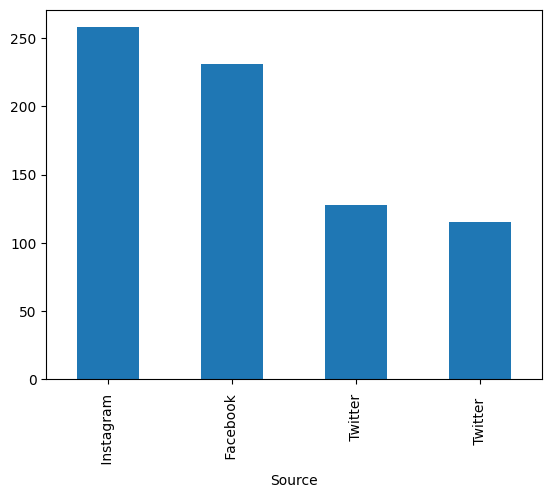

In [19]:
df['Source'].value_counts().plot(kind='bar')

<Axes: xlabel='Retweets'>

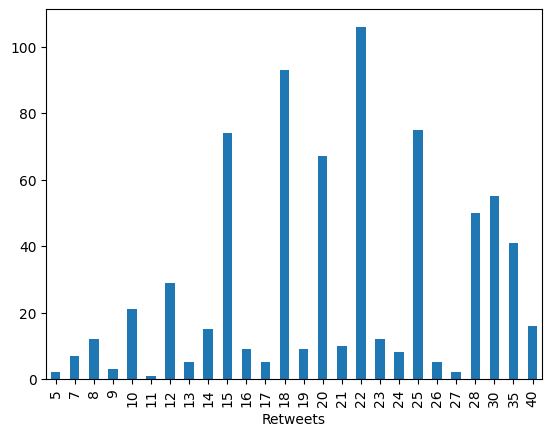

In [20]:
df['Retweets'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Likes'>

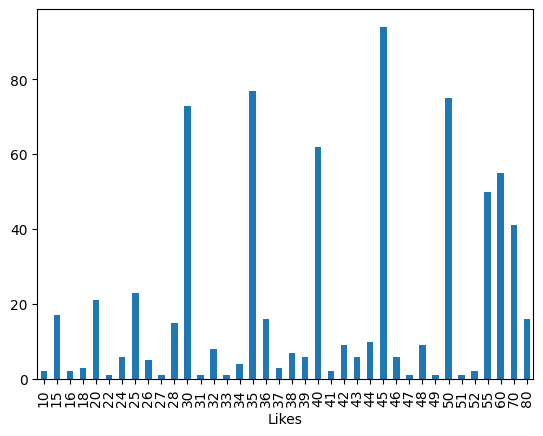

In [21]:
df['Likes'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Year'>

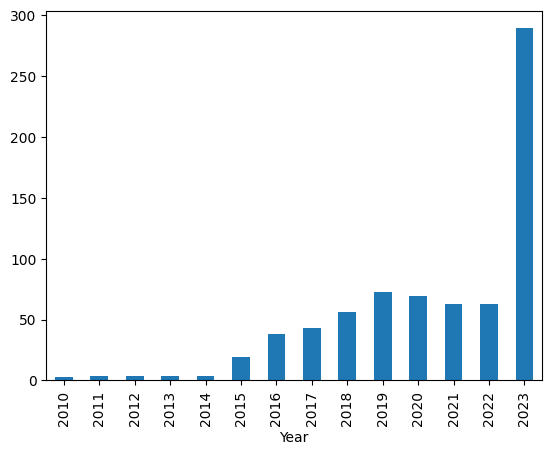

In [22]:
df['Year'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Month'>

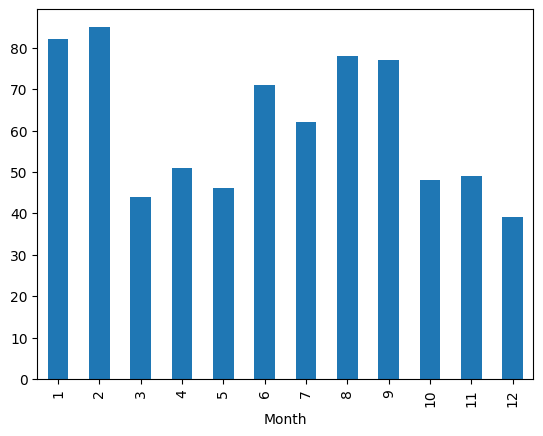

In [23]:
df['Month'].value_counts().sort_index().plot(kind='bar')


<Axes: xlabel='Day'>

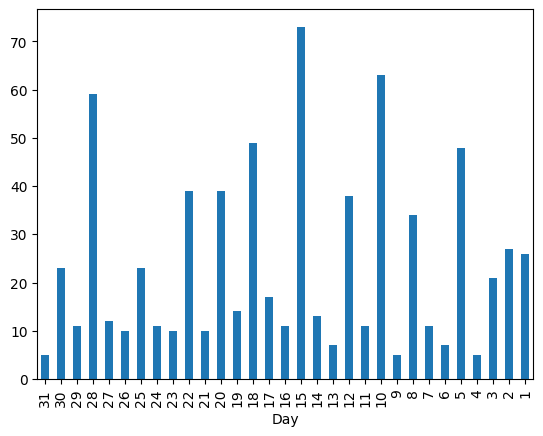

In [24]:
df['Day'].value_counts().sort_index(ascending=False).plot(kind='bar')

<Axes: xlabel='Hour'>

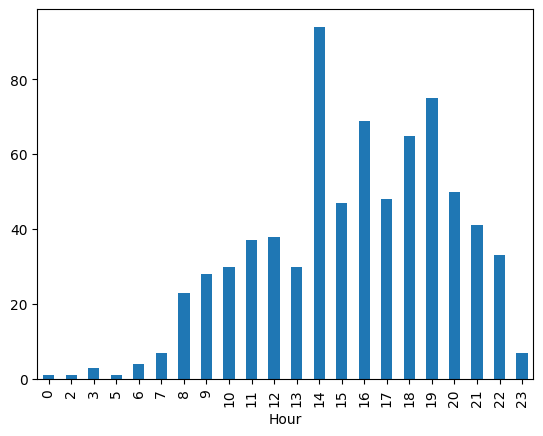

In [25]:
df['Hour'].value_counts().sort_index().plot(kind='bar')

# Step 2: Data Cleaning and Preprocessing
### Issues to resolve:
- Stripping Spaces from all columns that contain text:
    1. Source
    2. Country
    3. Topic
    4. User
    5. Sentiment
- Dropping Duplicates
- Separating the Topic Hashtags for further analysis.

In [26]:
# strip spaces
df['Source'] = df['Source'].str.strip()
df['Country'] = df['Country'].str.strip()
df['Topic'] = df['Topic'].str.strip()
df['User'] = df['User'].str.strip()
df['sentiment'] = df['sentiment'].str.strip()
df.head()

,Text,sentiment,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [27]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [28]:
# Extract hashtag
def extract_hashtags(text):
    matches = re.findall(r'#(\w+)', text)
    return matches[:2]

df[['hashtag1', 'hashtag2']] = df['Topic'].apply(extract_hashtags).tolist()
df[['hashtag1', 'hashtag2']]

,hashtag1,hashtag2
0,Nature,Park
1,Traffic,Morning
2,Fitness,Workout
3,Travel,Adventure
4,Cooking,Food
...,...,...
727,ScienceFairWinner,HighSchoolScience
728,SurpriseCelebration,HighSchoolFriendship
729,CommunityGiving,HighSchoolPhilanthropy
730,CulturalCelebration,HighSchoolUnity


# Step 3: Exploratory Data Analysis

In [29]:
df.head()

,Text,sentiment,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,hashtag1,hashtag2
0,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,Nature,Park
1,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,Traffic,Morning
2,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,Fitness,Workout
3,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,Travel,Adventure
4,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,Cooking,Food


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 0 to 731
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       711 non-null    object
 1   sentiment  711 non-null    object
 2   User       711 non-null    object
 3   Source     711 non-null    object
 4   Topic      711 non-null    object
 5   Retweets   711 non-null    int64 
 6   Likes      711 non-null    int64 
 7   Country    711 non-null    object
 8   Year       711 non-null    int64 
 9   Month      711 non-null    int64 
 10  Day        711 non-null    int64 
 11  Hour       711 non-null    int64 
 12  hashtag1   711 non-null    object
 13  hashtag2   711 non-null    object
dtypes: int64(6), object(8)
memory usage: 83.3+ KB


# Diving deeper to gain a better grasp of the data.


#### Lets find out which social media platform is used the most?

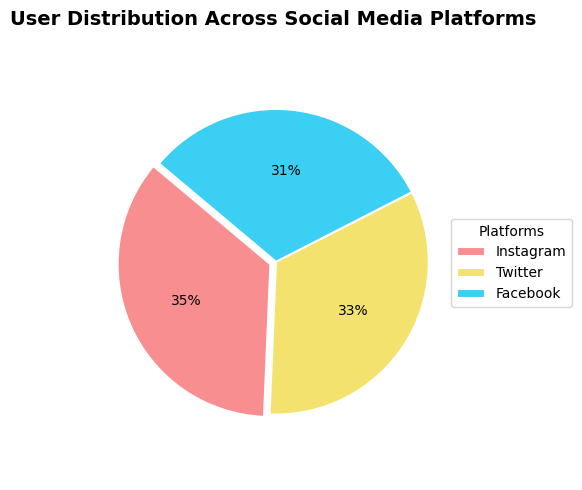

In [31]:
sources_count = df['Source'].value_counts().sort_values(ascending=False)
total_users = sources_count.sum()
# Color mapping 
colors = {
    'Facebook': "#3BCFF4",
    'Twitter': "#F3E36E",
    'Instagram': "#F88E90"
}
color_list = [colors.get(src, "#CCCCCC") for src in sources_count.index]
plt.figure(figsize=(5, 5))
plt.pie(
    sources_count,
    labels=None,                     
    autopct='%1.0f%%',
    startangle=140,
    explode=[0.04, 0, 0],
    colors=color_list,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)
plt.title(
    'User Distribution Across Social Media Platforms',
    fontsize=14,
    fontweight='bold',
    pad=15
)
plt.legend(
    sources_count.index,
    title='Platforms',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.axis('equal')
plt.tight_layout()
plt.show()


From this graph, it can be concluded that Instagram is the most used social media platform.
Now, data can be divided into 3 classes, each one represents a social media platform.

#### Dividing our Data into 3 Classes Based on the Social Media Platforms


In [32]:
# # Instagram
insta_df = df[df['Source']== 'Instagram']
insta_df = insta_df.reset_index(drop=True)
# insta_df


In [33]:
# Facebook
fb_df = df[df['Source']== 'Facebook']
fb_df = fb_df.reset_index(drop=True)
# fb_df


In [34]:
# Twitter
twi_df = df[df['Source']== 'Twitter']
twi_df = twi_df.reset_index(drop=True)
# twi_df


# Lets find out Which countries have the most users for each social media platform?

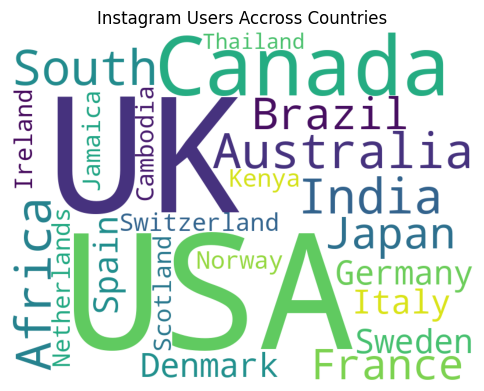

In [35]:
# Instagram usage 
cntry_counts = insta_df['Country'].value_counts()
wordcloud = WordCloud(background_color='white',width=800, height=600).generate(' '.join(cntry_counts.index))
plt.figure(figsize=(6, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Instagram Users Accross Countries")
plt.show()

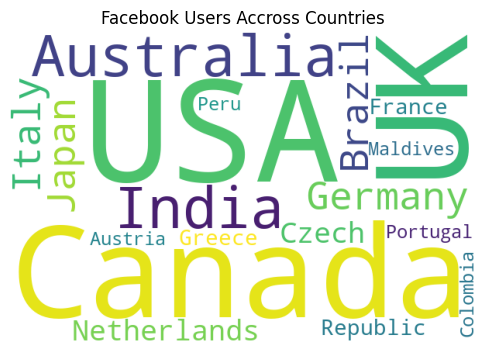

In [36]:
# Facebook users
cntry_counts = fb_df['Country'].value_counts()
wordcloud = WordCloud(background_color= 'white', height=400,width=600).generate('  '.join(cntry_counts.index))
plt.figure(figsize=(6,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Facebook Users Accross Countries")
plt.show()

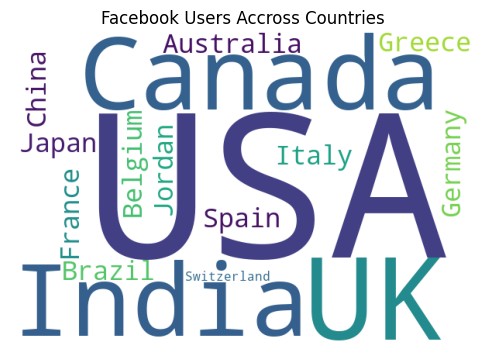

In [37]:
# Twitter
cntry_counts = twi_df['Country'].value_counts()
wordcloud = WordCloud(background_color='white',height=400,width=600).generate(' '.join(cntry_counts.index))
plt.figure(figsize=(6,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Facebook Users Accross Countries")
plt.show()

# Lets find out what is The Most Dominant **Sentiment** at each **hour** per day

In [38]:
# for instagram
# Ensure Hour is numeric
insta_df['Hour'] = pd.to_numeric(insta_df['Hour'], errors='coerce')
# Sentiment count per hour
insta_senti_hr = (
    insta_df
    .groupby('Hour')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)
# Dominant sentiment per hour
insta_domi_senti = insta_senti_hr.idxmax(axis=1)
# Keep only dominant sentiment columns
insta_senti_count = insta_senti_hr[insta_domi_senti.unique()]
# Convert to long format for Plotly
insta_senti_long = insta_senti_count.reset_index().melt(
    id_vars='Hour',
    var_name='Sentiment',
    value_name='Count'
)
# Plot
fig1 = px.bar(
    insta_senti_long,
    x='Hour',
    y='Count',
    color='Sentiment',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Instagram Dominant Sentiment by Hour',
)
fig1.update_layout(
    xaxis_title='Hour',
    yaxis_title='Count',
    legend_title_text='Dominant Sentiments',
    bargap=0.2
)
fig1.show()


In [39]:
# for facebook
# Ensure Hour is numeric
fb_df['Hour'] = pd.to_numeric(fb_df['Hour'], errors='coerce')
# Sentiment count per hour
fb_senti_hr = (
    fb_df
    .groupby('Hour')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)
# Dominant sentiment per hour
fb_domi_senti = fb_senti_hr.idxmax(axis=1)
# Keep only dominant sentiment columns
fb_senti_count = fb_senti_hr[fb_domi_senti.unique()]
# Convert to long format for Plotly
fb_senti_long = fb_senti_count.reset_index().melt(
    id_vars='Hour',
    var_name='Sentiment',
    value_name='Count'
)
# Plot
fig2 = px.bar(
    fb_senti_long,
    x='Hour',
    y='Count',
    color='Sentiment',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Facebook Dominant Sentiment by Hour',
)
fig2.update_layout(
    xaxis_title='Hour',
    yaxis_title='Count',
    legend_title_text='Dominant Sentiments',
    bargap=0.2
)
fig2.show()


In [40]:
# for twitter
# Ensure Hour is numeric
twi_df['Hour'] = pd.to_numeric(twi_df['Hour'], errors='coerce')
# Sentiment count per hour
twi_senti_hr = (
    twi_df
    .groupby('Hour')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)
# Dominant sentiment per hour
twi_domi_senti = twi_senti_hr.idxmax(axis=1)
# Keep only dominant sentiment columns
twi_senti_count = twi_senti_hr[twi_domi_senti.unique()]
# Convert to long format for Plotly
twi_senti_long = twi_senti_count.reset_index().melt(
    id_vars='Hour',
    var_name='Sentiment',
    value_name='Count'
)
# Plot
fig3 = px.bar(
    twi_senti_long,
    x='Hour',
    y='Count',
    color='Sentiment',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Twitter Dominant Sentiment by Hour',
)
fig3.update_layout(
    xaxis_title='Hour',
    yaxis_title='Count',
    legend_title_text='Dominant Sentiments',
    bargap=0.2
)
fig3.show()


# Lets find out what are The Most Dominant **Sentiments** throughout the **Years**

In [41]:
# for instagram
# Ensure Hour is numeric
# insta_df['Year'] = pd.to_numeric(insta_df['Year'], errors='coerce')
# Sentiment count per hour
senti_yr = (df.groupby('Year')['sentiment'].value_counts().unstack(fill_value=0))
# Dominant sentiment per hour
domi_senti = senti_yr.idxmax(axis=1)
# Keep only dominant sentiment columns
senti_count = senti_yr[domi_senti.unique()]
# Convert to long format for Plotly
senti_long = senti_count.reset_index().melt(
    id_vars='Year',
    var_name='Sentiment',
    value_name='Count'
)
# Plot
fig4 = px.bar(
    senti_long,
    x='Year',
    y='Count',
    color='Sentiment',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Dominant Sentiments by Year',
)
fig4.update_layout(
    xaxis_title='Year',
    yaxis_title='Count',
    legend_title_text='Dominant Sentiments',
    bargap=0.2
)
fig4.show()


It can be noticed that social media users where happy across all those years that this data has but the year "2019" contains negative sentiments like ['Numbness','Lonliness','Ambivalence'] with high proportions due to the occurence of the COVID-19 Global Pandemic and users experienced terrible events like quarantine and news about deaths.

# Lets find out what are The Most Frequent Hashtags on social media platforms

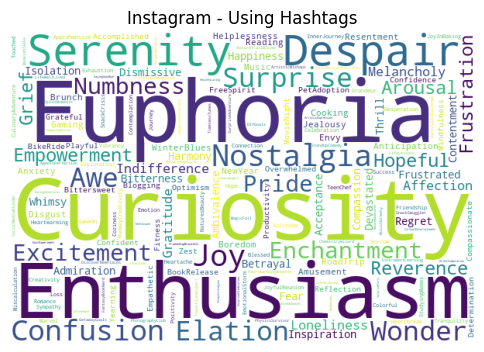

In [42]:
# Instagram
insta_hash1 = insta_df['hashtag1'].value_counts()
wordcloud = WordCloud(background_color='white', height=400,width=600).generate('  '.join(insta_hash1.index))
plt.figure(figsize=(6,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Instagram - Using Hashtags")
plt.show()


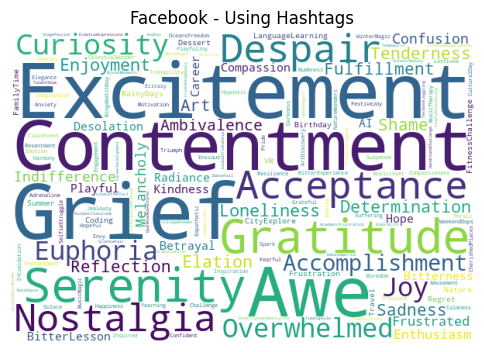

In [43]:
# Facebook
fb_hash1 = fb_df['hashtag1'].value_counts()
wordcloud = WordCloud(background_color='white', height=400,width=600).generate('  '.join(fb_hash1.index))
plt.figure(figsize=(6,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Facebook - Using Hashtags")
plt.show()


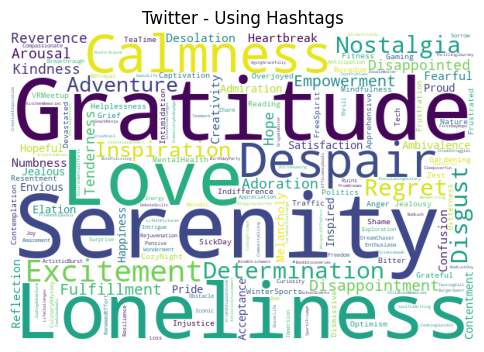

In [44]:
# Twitter
twi_hash1 = twi_df['hashtag1'].value_counts()
wordcloud = WordCloud(background_color='white', height=400,width=600).generate('  '.join(twi_hash1.index))
plt.figure(figsize=(6,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Twitter - Using Hashtags")
plt.show()


# Lets find out distribution of Likes Across Top Sentiment

In [45]:
# Instagram
insta_like_senti = pd.crosstab(
    insta_df[insta_df['sentiment'].isin(insta_domi_senti)]['sentiment'],insta_df['Likes'],normalize=0
)
insta_like_senti_long = (insta_like_senti.reset_index().melt(id_vars='sentiment', var_name='Likes',value_name='Proportion'))
fig6 = px.bar(
    insta_like_senti_long,
    x='sentiment',
    y='Proportion',
    color='Likes',
    title='Instagram Dominant Sentiment vs Likes Distribution',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig6.update_layout(
    xaxis_title='Sentiment',
    yaxis_title='Proportion of Likes',
    legend_title_text='Likes',
    bargap=0.2
)

fig6.show()


In [46]:
# Facebook
fb_like_senti = pd.crosstab(
    fb_df[fb_df['sentiment'].isin(fb_domi_senti)]['sentiment'],fb_df['Likes'],normalize=0
)
fb_like_senti_long = (fb_like_senti.reset_index().melt(id_vars='sentiment', var_name='Likes',value_name='Proportion'))
fig7 = px.bar(
    fb_like_senti_long,
    x='sentiment',
    y='Proportion',
    color='Likes',
    title='Facebook Dominant Sentiment vs Likes Distribution',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig7.update_layout(
    xaxis_title='Sentiment',
    yaxis_title='Proportion of Likes',
    legend_title_text='Likes',
    bargap=0.2
)

fig7.show()


In [47]:
# Twitter
twi_like_senti = pd.crosstab(
    twi_df[twi_df['sentiment'].isin(twi_domi_senti)]['sentiment'],twi_df['Likes'],normalize=0
)
twi_like_senti_long = (twi_like_senti.reset_index().melt(id_vars='sentiment', var_name='Likes',value_name='Proportion'))
fig8 = px.bar(
    twi_like_senti_long,
    x='sentiment',
    y='Proportion',
    color='Likes',
    title='Twitter Dominant Sentiment vs Likes Distribution',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig8.update_layout(
    xaxis_title='Sentiment',
    yaxis_title='Proportion of Likes',
    legend_title_text='Likes',
    bargap=0.2
)

fig8.show()


# Lets find out what Hour has The Most Likes Interactions

In [48]:
# Instagram
fig9 = px.scatter(insta_df, x= 'Hour', y='Likes',
                  title='Relationship between Likes and Hour')
fig9.update_layout(
    xaxis_title='Hour',
    yaxis_title='Likes'
)
fig9.show()


In [49]:
# Facebook
fig10 = px.scatter(fb_df, x= 'Hour', y='Likes',
                  title='Relationship between Likes and Hour')
fig10.update_layout(
    xaxis_title='Hour',
    yaxis_title='Likes'
)
fig10.show()

In [50]:
# Twitter
fig11 = px.scatter(twi_df, x= 'Hour', y='Likes',
                  title='Relationship between Likes and Hour')
fig11.update_layout(
    xaxis_title='Hour',
    yaxis_title='Likes'
)
fig11.show()

# Lets find out what are The Most Liked Hashtags

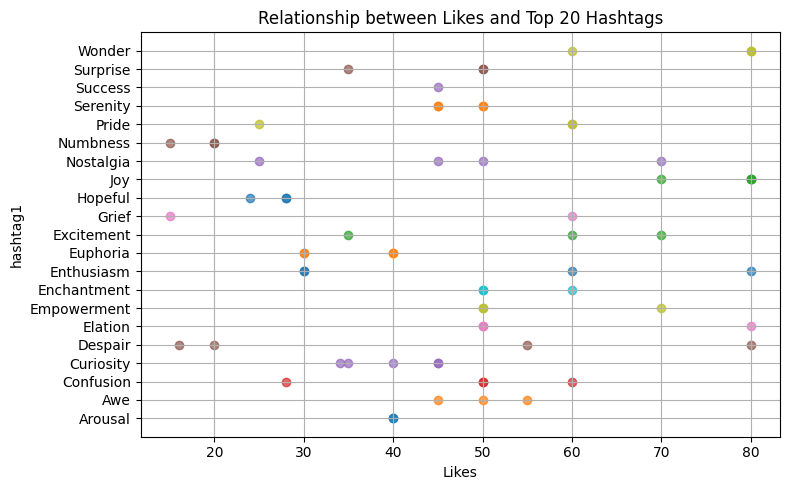

In [51]:
# Instagram
hash_count = insta_df['hashtag1'].value_counts().head(20) + insta_df['hashtag2'].value_counts().head(20) 
hash_count
plt.figure(figsize=(8,5))
for hashtag, count in hash_count.items():
    filtered_df = insta_df[insta_df['hashtag1'] == hashtag]
    plt.scatter(filtered_df['Likes'], [hashtag] * len(filtered_df), alpha=0.7)
plt.xlabel('Likes')
plt.ylabel('hashtag1')
plt.title('Relationship between Likes and Top 20 Hashtags')
plt.grid(True)
plt.tight_layout()
plt.show()

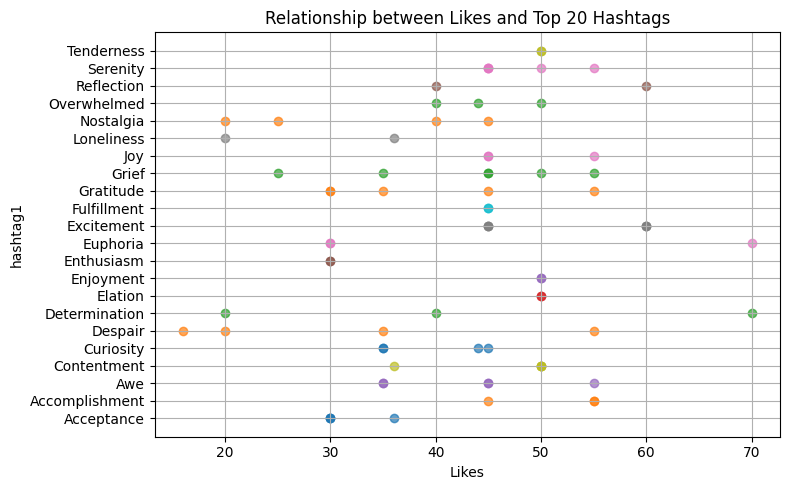

In [52]:
# Facebook
hash_count = fb_df['hashtag1'].value_counts().head(20) +fb_df['hashtag2'].value_counts().head(20) 
plt.figure(figsize=(8,5))
for hashtag, count in hash_count.items():
    filtered_df = fb_df[fb_df['hashtag1'] == hashtag]
    plt.scatter(filtered_df['Likes'], [hashtag] * len(filtered_df), alpha=0.7)
plt.xlabel('Likes')
plt.ylabel('hashtag1')
plt.title('Relationship between Likes and Top 20 Hashtags')
plt.grid(True)
plt.tight_layout()
plt.show()

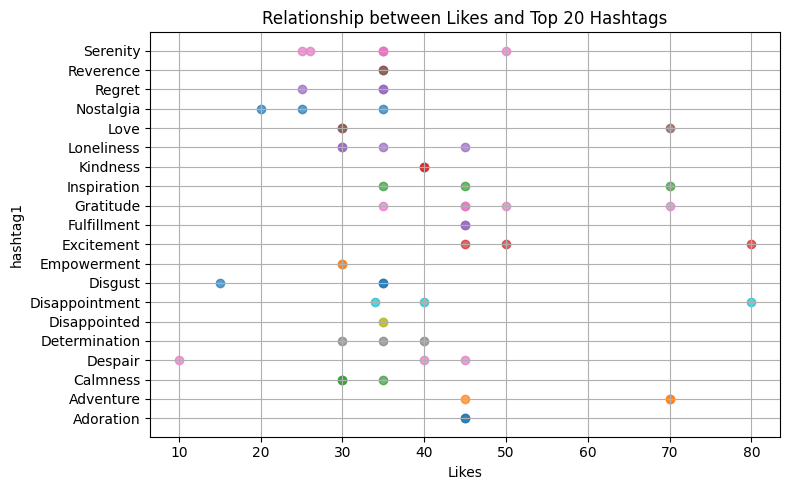

In [53]:
# Twitter
hash_count = twi_df['hashtag1'].value_counts().head(20) + twi_df['hashtag2'].value_counts().head(20) 
plt.figure(figsize=(8,5))
for hashtag, count in hash_count.items():
    filtered_df = twi_df[twi_df['hashtag1'] == hashtag]
    plt.scatter(filtered_df['Likes'], [hashtag] * len(filtered_df), alpha=0.7)
plt.xlabel('Likes')
plt.ylabel('hashtag1')
plt.title('Relationship between Likes and Top 20 Hashtags')
plt.grid(True)
plt.tight_layout()
plt.show()

# Words in Posts Captions

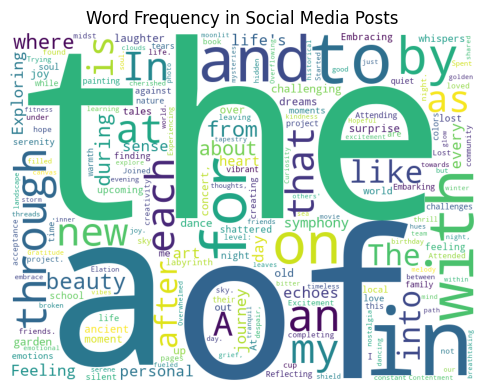

In [54]:
word_counts = Counter(word for text in df['Text'].to_list() for word in text.split())
wordcloud = WordCloud(background_color="white", width=800, height=600)
wordcloud.generate_from_frequencies(word_counts)
plt.figure(figsize=(6,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency in Social Media Posts")
plt.show()

The absence of slang terms in the analyzed social media captions suggests a formal or neutral tone in the content. This could be due to various factors, such as the target audience, brand identity, or platform guidelines.
Removing unnecessary prepositions could improve model efficiency.

# Time Series Analysis
#### Likes across the years

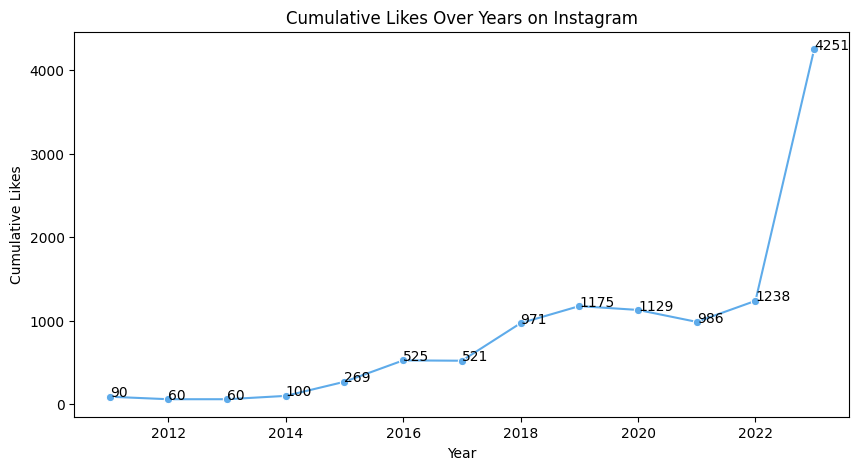

In [55]:
# Intagram
insta_likes = insta_df.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=insta_likes, x='Year', y='Likes', marker='o', color="#5eabea")
for index, value in insta_likes.iterrows():
     plt.text(value['Year'], value['Likes'], str(value['Likes']))
plt.title('Cumulative Likes Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

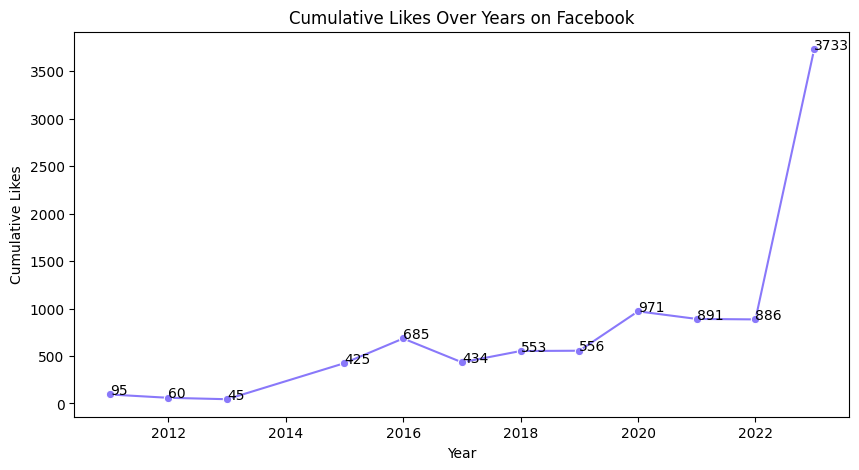

In [56]:
# Facebook
fb_likes = fb_df.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=fb_likes,x='Year', y='Likes', marker='o', color="#8978fa")
for index, value in fb_likes.iterrows():
     plt.text(value['Year'], value['Likes'], str(value['Likes']))
plt.title('Cumulative Likes Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')
plt.show()

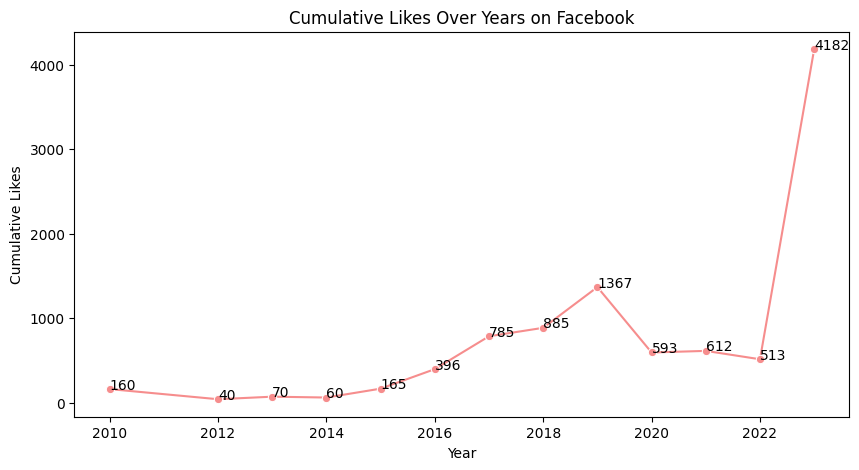

In [57]:
# Twitter
twi_likes = twi_df.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=twi_likes ,x='Year', y='Likes', marker='o', color="#f68d8d")
for index, value in twi_likes.iterrows():
     plt.text(value['Year'], value['Likes'], str(value['Likes']))
plt.title('Cumulative Likes Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')
plt.show()

# Lets find out Retweets across the years

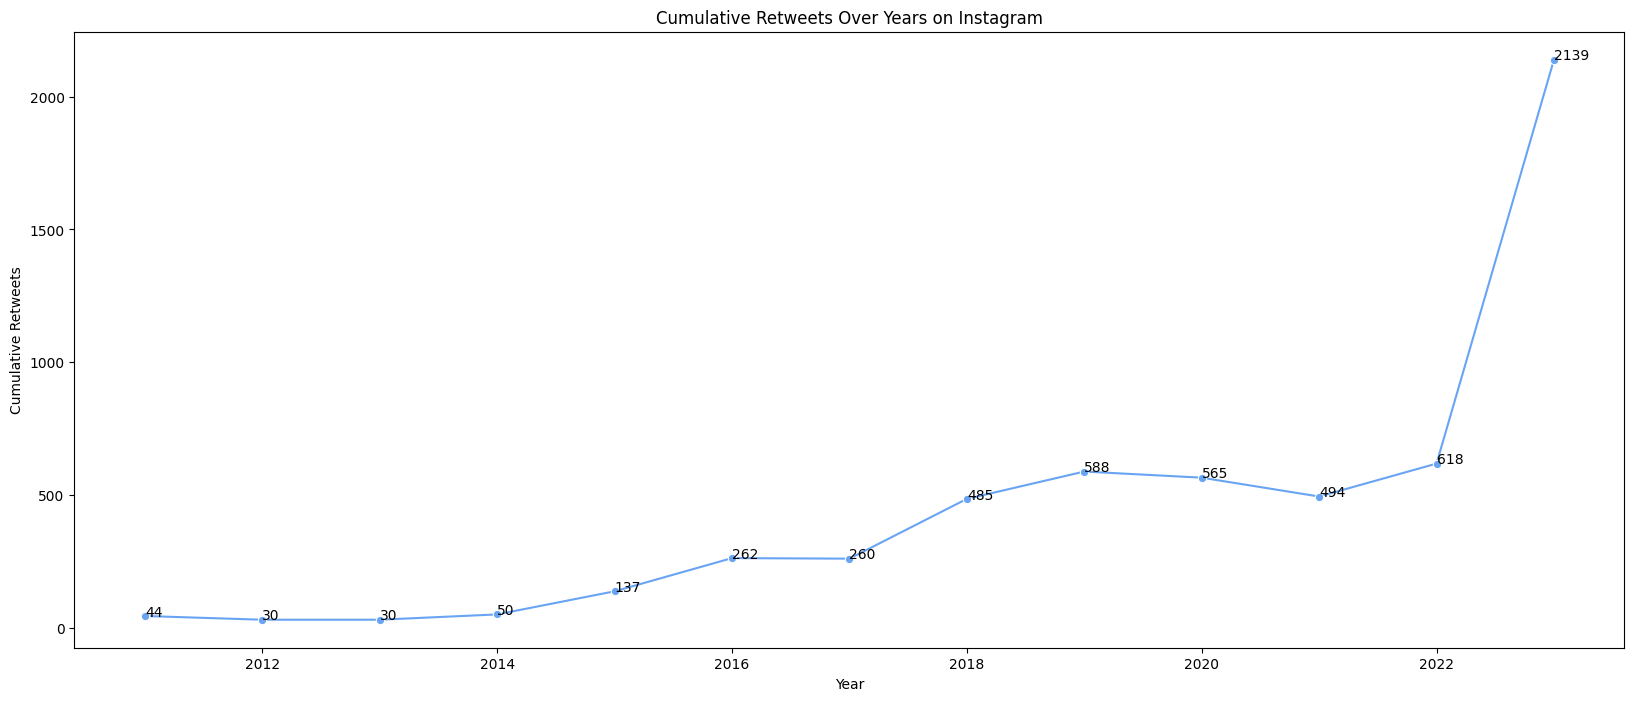

In [58]:
# Instagram
insta_retweets = insta_df.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(20, 8))
sns.lineplot(data=insta_retweets, x='Year', y='Retweets', marker='o', color="#69a4f3")
for index, value in insta_retweets.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']))
plt.title('Cumulative Retweets Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')
plt.show()

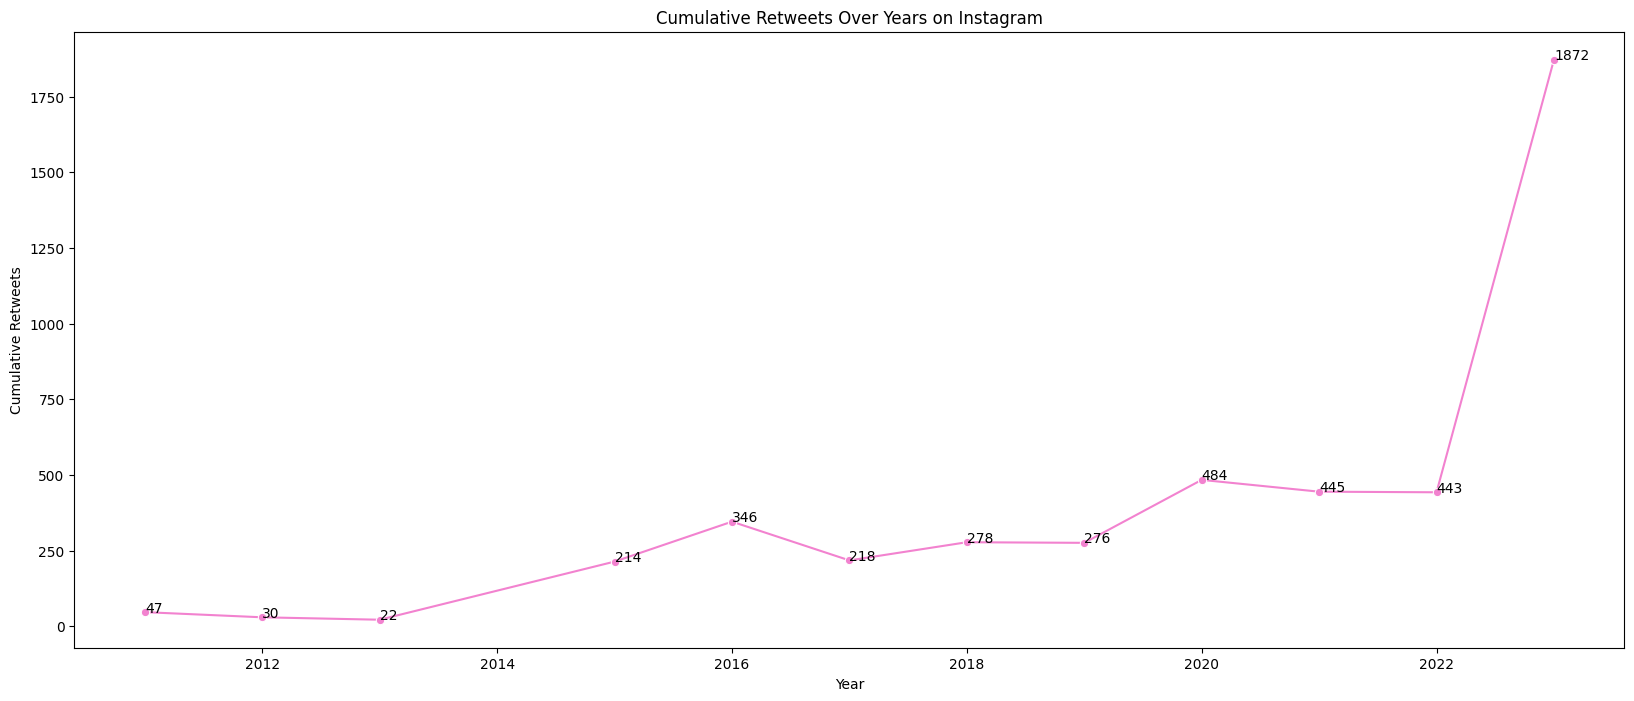

In [59]:
# Facebook
fb_retweets = fb_df.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(20, 8))
sns.lineplot(data=fb_retweets, x='Year', y='Retweets', marker='o', color="#f282cf")
for index, value in fb_retweets.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']))
plt.title('Cumulative Retweets Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')
plt.show()

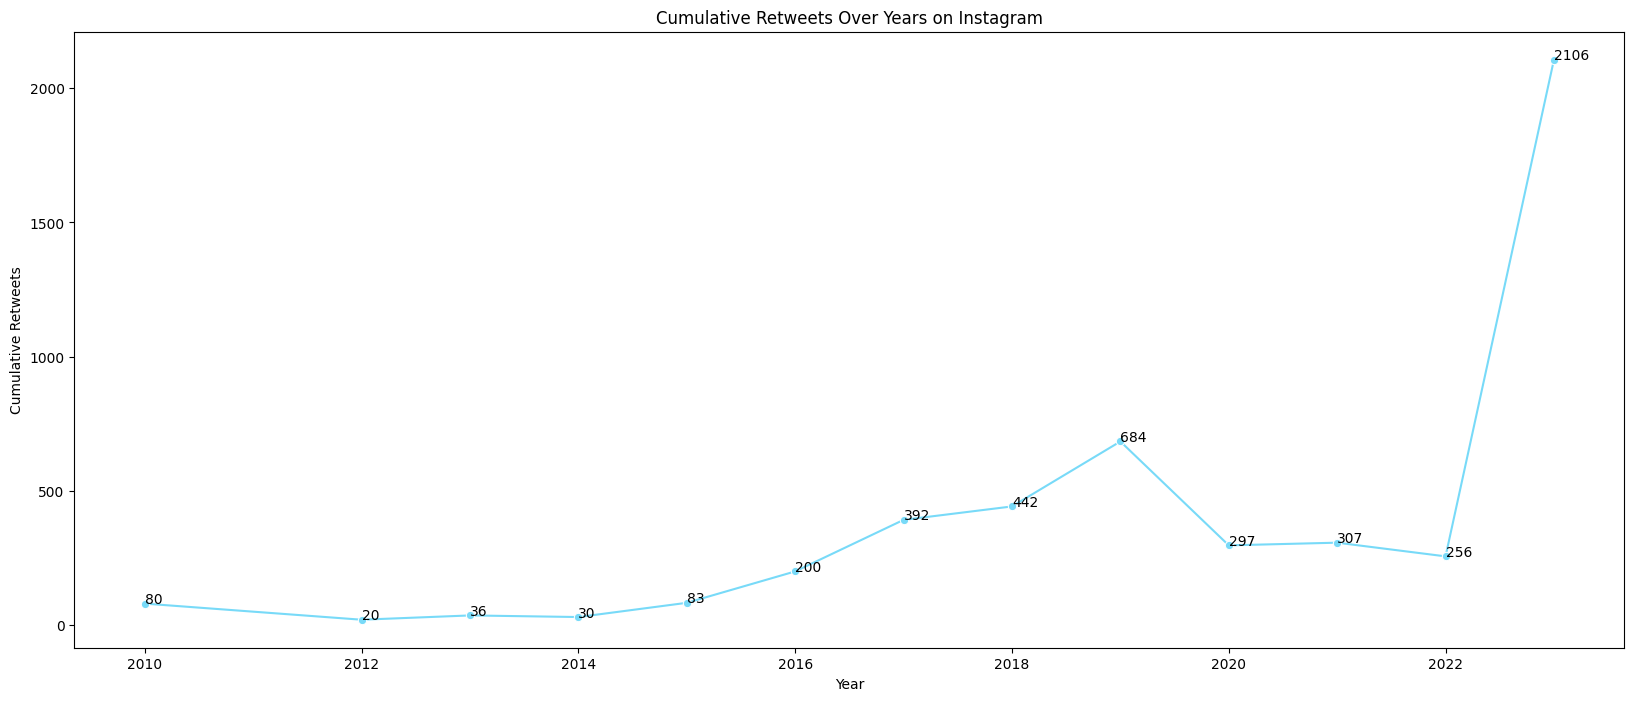

In [60]:
# Twitter
twi_retweets = twi_df.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(20, 8))
sns.lineplot(data=twi_retweets, x='Year', y='Retweets', marker='o', color="#78daf8")
for index, value in twi_retweets.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']))
plt.title('Cumulative Retweets Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')
plt.show()


# Step 4: Premodelling Phase

In [61]:
# Importing Libraries
import nltk
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Making a new sentiment column using vader score.

In [62]:
SIA = SentimentIntensityAnalyzer()
df['Vader Score'] = df['sentiment'].apply(lambda text: SIA.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader Score'].apply(lambda score: 'positive' if score >= 0.05
                                          else('negative' if score <= -0.05
                                               else 'neutral'))
df.head(5)

,Text,sentiment,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,hashtag1,hashtag2,Vader Score,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,Nature,Park,0.5574,positive
1,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,Traffic,Morning,-0.5719,negative
2,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,Fitness,Workout,0.5574,positive
3,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,Travel,Adventure,0.5574,positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,Cooking,Food,0.0000,neutral


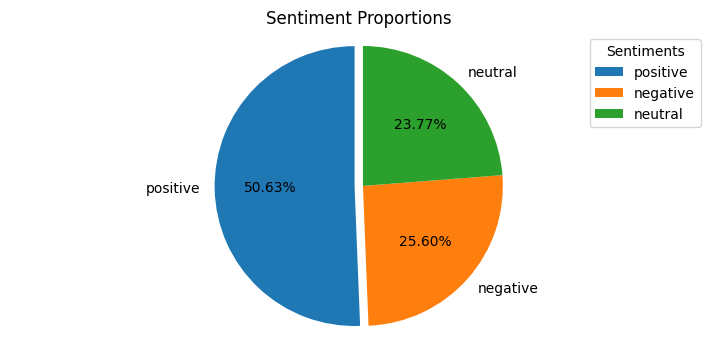

In [63]:
senti_count = df['Sentiment'].value_counts()
plt.figure(figsize=(9,4))
plt.pie(senti_count, labels= senti_count.index, autopct='%1.2f%%', explode= [0.06,0,0], startangle= 90)
plt.title('Sentiment Proportions')
plt.legend(title='Sentiments')
plt.axis('equal')
plt.show()

# Correlation Analysis(heatmap)

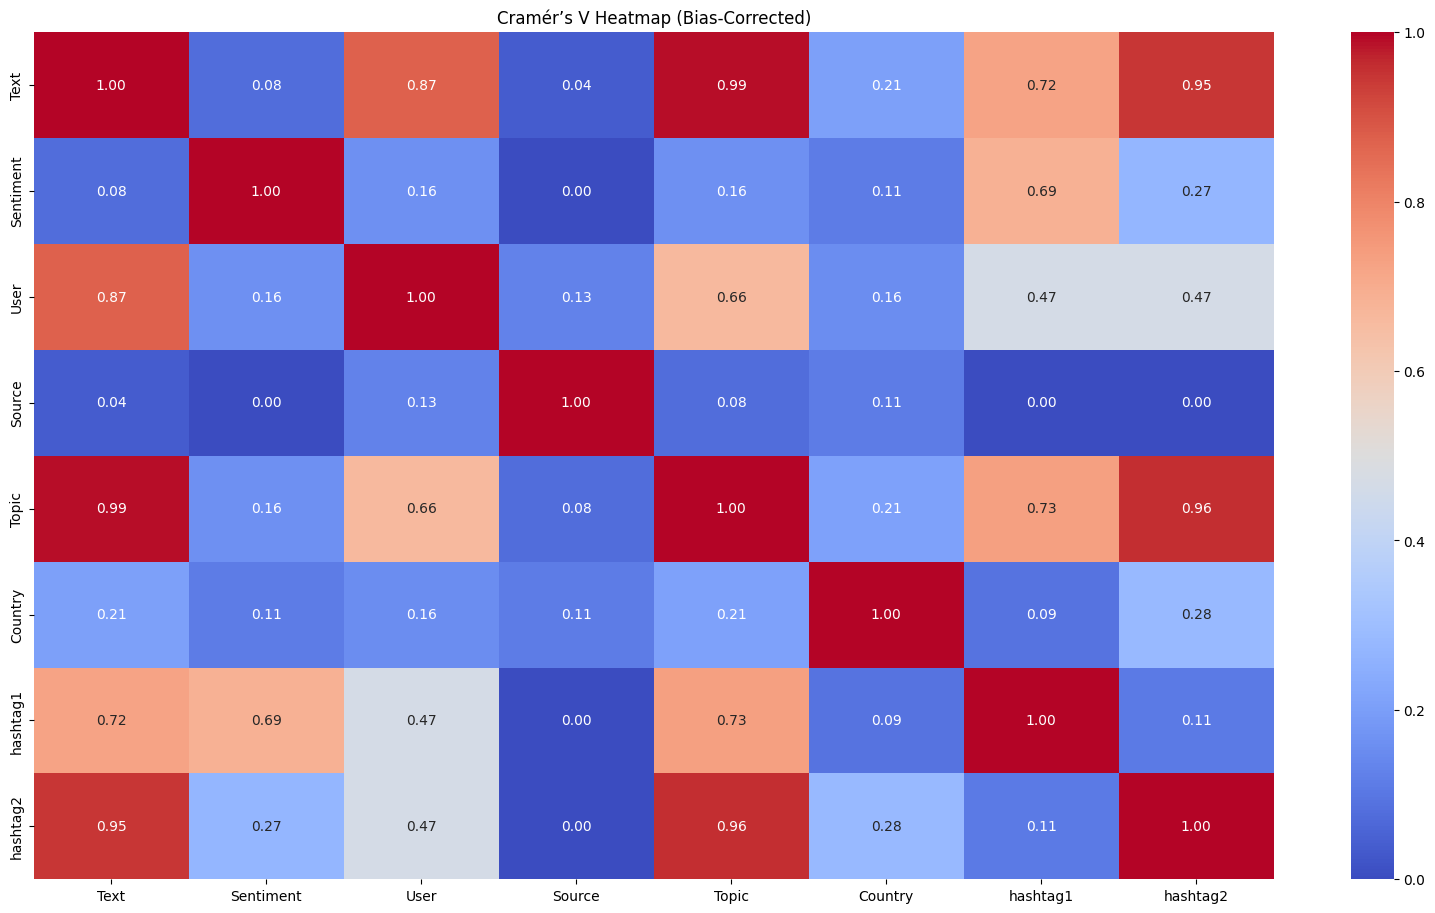

In [64]:
cat_vars = ['Text', 'Sentiment', 'User',
            'Source', 'Topic', 'Country',
            'hashtag1', 'hashtag2']
cat_df = df[cat_vars]
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.values.sum()
    r, k = table.shape
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min(kcorr-1, rcorr-1))
matrix = pd.DataFrame(index=cat_vars, columns=cat_vars)
for c1 in cat_vars:
    for c2 in cat_vars:
        matrix.loc[c1, c2] = cramers_v(cat_df[c1], cat_df[c2])
matrix = matrix.astype(float)
plt.figure(figsize=(20, 11))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Cramér’s V Heatmap (Bias-Corrected)")
plt.show()


From the heatmap, it can be seen that:
- The Text column shows no correlation with the new sentiment column. This is expected because text is not a typical categorical variable and has too much complexity to capture with correlation alone.
- The hashtag1 and hashtag2 columns show the strongest correlation with sentiment, making them the most useful features from the heatmap.\
**Conclusion:** Combine Text, hashtag1, and hashtag2 into a single string (since this represents the full post caption), clean it, and vectorize it to train the models in the next steps.

# Clean the **Text** column

In [65]:
# Initialize stemmer and stopwords globally
stemmer = SnowballStemmer('english')
all_stopwords = set(stopwords.words('english'))
all_stopwords.discard('not')  # Keep 'not'

# Combine text + hashtags
df['Text'] = df['Text'] + " " + df['hashtag1'] + " " + df['hashtag2']

# Define cleaning function
def clean_text(sentence):
    sentence = str(sentence)
    # Remove URLs
    sentence = re.sub(r"(https?://\S+|www\.\S+)", " ", sentence)
    # Remove non-letters
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Lowercase and split on whitespace (no NLTK tokenization)
    tokens = re.split(r'\s+', sentence.lower())
    # Remove stopwords and stem
    tokens = [stemmer.stem(token) for token in tokens if token and token not in all_stopwords]
    return ' '.join(tokens)

# Apply cleaning
df['Text'] = df['Text'].apply(clean_text)

# Preview
df['Text'].head(6)


0                    enjoy beauti day park natur park
1                   traffic terribl morn traffic morn
2                     finish amaz workout fit workout
3         excit upcom weekend getaway travel adventur
4              tri new recip dinner tonight cook food
5    feel grate littl thing life gratitud positivevib
Name: Text, dtype: object

In [66]:
# Drop unnecessary variables
df.drop(['User', 'Source', 'Topic', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour', 'hashtag1',
       'hashtag2','sentiment', 'Vader Score'],axis = 1, inplace = True)
df.columns

Index(['Text', 'Sentiment'], dtype='object')

In [67]:
df

,Text,Sentiment
0,enjoy beauti day park natur park,positive
1,traffic terribl morn traffic morn,negative
2,finish amaz workout fit workout,positive
3,excit upcom weekend getaway travel adventur,positive
4,tri new recip dinner tonight cook food,neutral
...,...,...
727,collabor scienc project receiv recognit region...,positive
728,attend surpris birthday parti organ friend sur...,positive
729,success fundrais school chariti initi joy give...,positive
730,particip multicultur festiv celebr divers musi...,positive


In [68]:
# Encoding Sentiment Column
df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':2, "neutral":0})
df['Sentiment'].value_counts()

Sentiment
1    360
2    182
0    169
Name: count, dtype: int64

# Vectorize our Text Column

In [69]:
# Bag of Words Method
bow_vecto = CountVectorizer(max_features=2000)
bow_vecto.fit(df['Text'])
bow_mat = bow_vecto.transform(df['Text'])
bow_mat

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5934 stored elements and shape (711, 2000)>

In [70]:
#TF-IDF Method
tf_idf_vecto = TfidfVectorizer(max_features=2000)
tf_idf_mat = tf_idf_vecto.fit_transform(df['Text'])
tf_idf_mat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5934 stored elements and shape (711, 2000)>

In [71]:
# Splitting Data Into Train and Test sets
# For Bow
x1 = bow_mat
y1 = df['Sentiment']
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42,stratify=y1)

# For TF-IDF
x2 = tf_idf_mat
y2 = df['Sentiment']
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42,stratify=y2)

# Step 5: Modelling
This is a classification problem so these model would be used:
Logistic Regression,
K-Nearest Neighbors,
Naive Bayes (Multinomial),
Support Vector Machine (SVM),
Decision Tree,
Random Forest.
These metrics will be used to evaluate the model: Accuracy Score, Precision, Recall, F1-Score


In [72]:
# Importing the Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Importing Splitting Library and Model Evaluation Metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [73]:
# Functions

def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result
# Model Evaluation
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(2, 2)
    table.set_fontsize(12)
    ax2.axis('tight')
    ax2.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('white')
    plt.tight_layout()
    plt.show()

# Logistic Regression


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       288
           2       1.00      1.00      1.00       145

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.65      0.73        34
           1       0.81      0.96      0.88        72
           2       0.97      0.84      0.90        37

    accuracy                           0.85       143
   macro avg       0.88      0.81      0.84       143
weighted avg       0.86      0.85      0.85       143



c:\Users\Admin\miniconda3\envs\sentiment-analysis\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning:

'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.



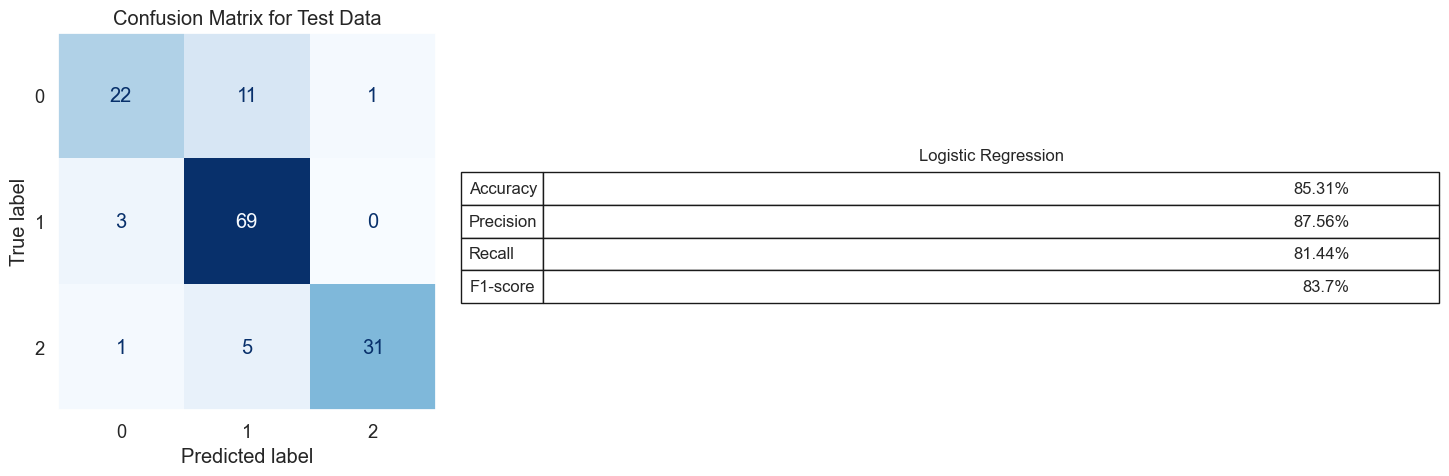

In [74]:
# Using Bag of Words
lr_bow_model = LogisticRegression(solver='lbfgs', penalty='l2',max_iter=1000)
lr_bow_model.fit(X1_train, y1_train)
model_evaluation(lr_bow_model , X1_train , X1_test, y1_train, y1_test, "Logistic Regression")


c:\Users\Admin\miniconda3\envs\sentiment-analysis\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning:

'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.




	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       135
           1       0.91      1.00      0.95       288
           2       0.98      0.98      0.98       145

    accuracy                           0.95       568
   macro avg       0.96      0.92      0.94       568
weighted avg       0.95      0.95      0.94       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        34
           1       0.69      1.00      0.82        72
           2       1.00      0.65      0.79        37

    accuracy                           0.78       143
   macro avg       0.90      0.70      0.74       143
weighted avg       0.85      0.78      0.76       143



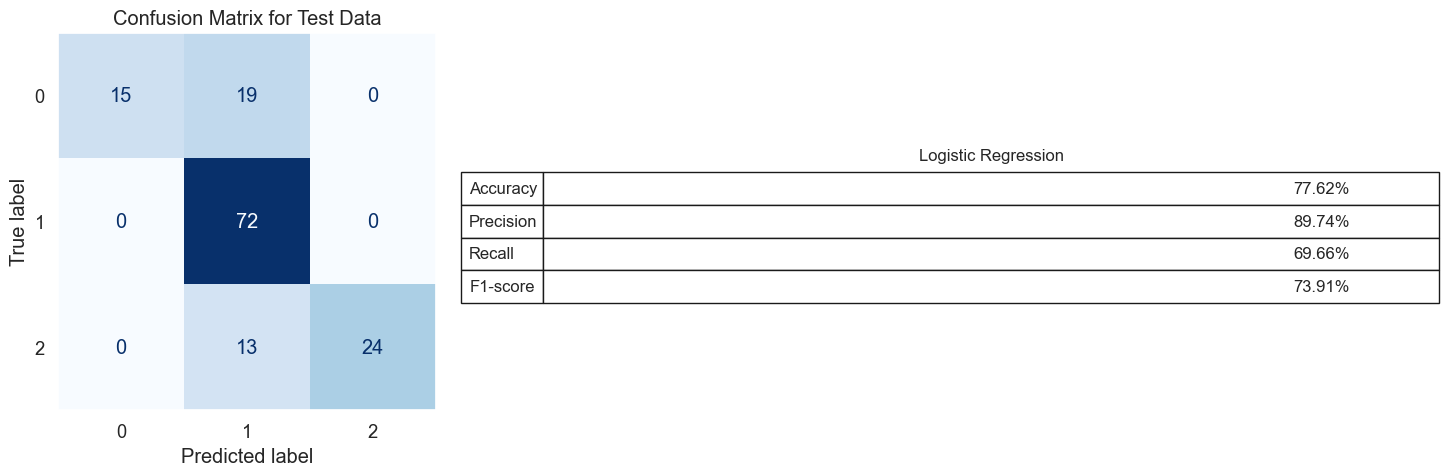

In [75]:
# Using TF-IDF
lr_tfidf_model = LogisticRegression(solver='lbfgs', penalty='l2',max_iter=1000)
lr_tfidf_model.fit(X2_train, y2_train)
model_evaluation(lr_tfidf_model , X2_train , X2_test, y2_train, y2_test, "Logistic Regression")

# K-Nearest Neighbors


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       135
           1       0.87      0.95      0.91       288
           2       0.94      0.89      0.91       145

    accuracy                           0.89       568
   macro avg       0.90      0.86      0.88       568
weighted avg       0.89      0.89      0.89       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.47      0.60        34
           1       0.74      0.92      0.82        72
           2       0.80      0.76      0.78        37

    accuracy                           0.77       143
   macro avg       0.79      0.71      0.73       143
weighted avg       0.78      0.77      0.76       143



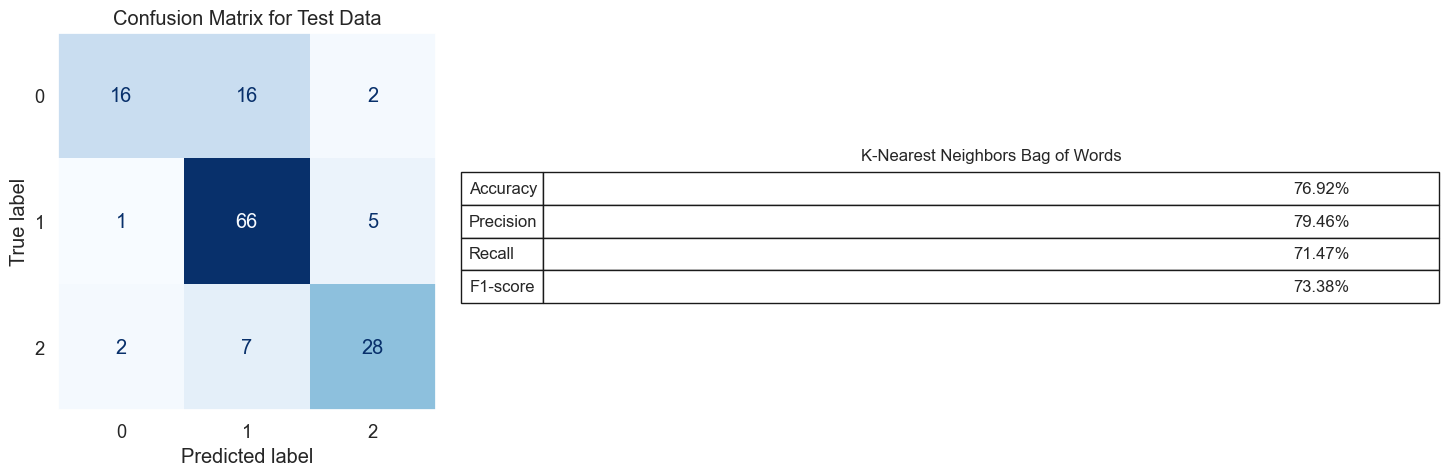

In [76]:
# Using Bag of Words
knn_bow_model = KNeighborsClassifier(n_neighbors=3)
knn_bow_model.fit(X1_train,y1_train)
model_evaluation(knn_bow_model, X1_train, X1_test, y1_train, y1_test, "K-Nearest Neighbors Bag of Words")


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       135
           1       0.90      0.95      0.93       288
           2       0.96      0.94      0.95       145

    accuracy                           0.90       568
   macro avg       0.90      0.89      0.89       568
weighted avg       0.90      0.90      0.90       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        34
           1       0.81      0.88      0.84        72
           2       0.89      0.89      0.89        37

    accuracy                           0.82       143
   macro avg       0.82      0.79      0.80       143
weighted avg       0.82      0.82      0.81       143



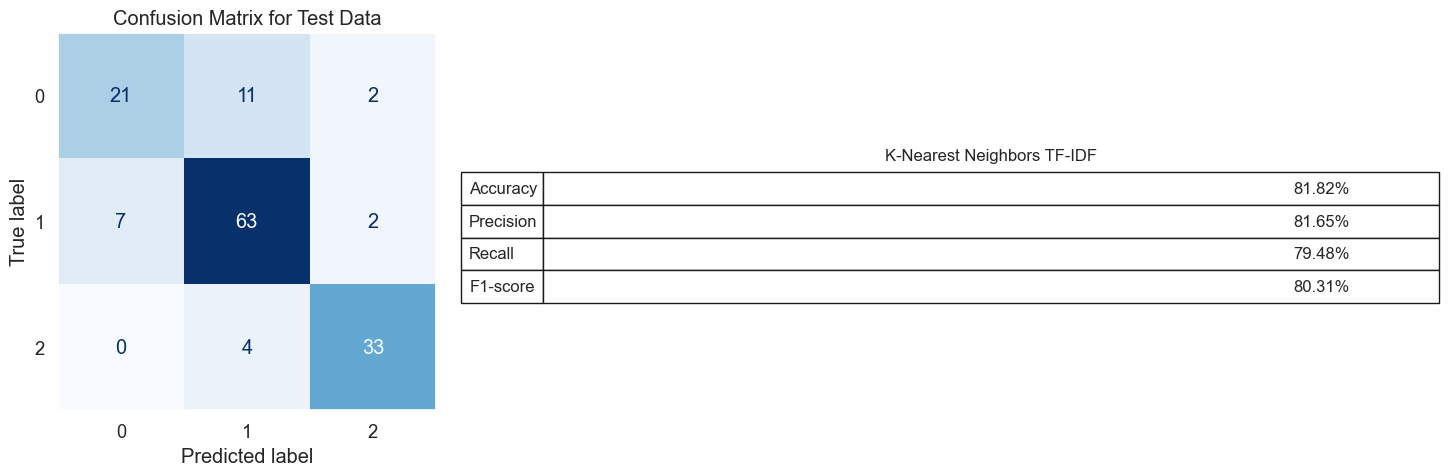

In [77]:
# Using TF-IDF
knn_tfidf_model = KNeighborsClassifier(n_neighbors=3)
knn_tfidf_model.fit(X2_train,y2_train)
model_evaluation(knn_tfidf_model, X2_train, X2_test, y2_train, y2_test, "K-Nearest Neighbors TF-IDF")

# Multinomial Naive Bayes


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       135
           1       0.99      0.97      0.98       288
           2       0.96      1.00      0.98       145

    accuracy                           0.97       568
   macro avg       0.97      0.97      0.97       568
weighted avg       0.97      0.97      0.97       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        34
           1       0.87      0.83      0.85        72
           2       0.87      0.92      0.89        37

    accuracy                           0.83       143
   macro avg       0.81      0.82      0.81       143
weighted avg       0.83      0.83      0.83       143



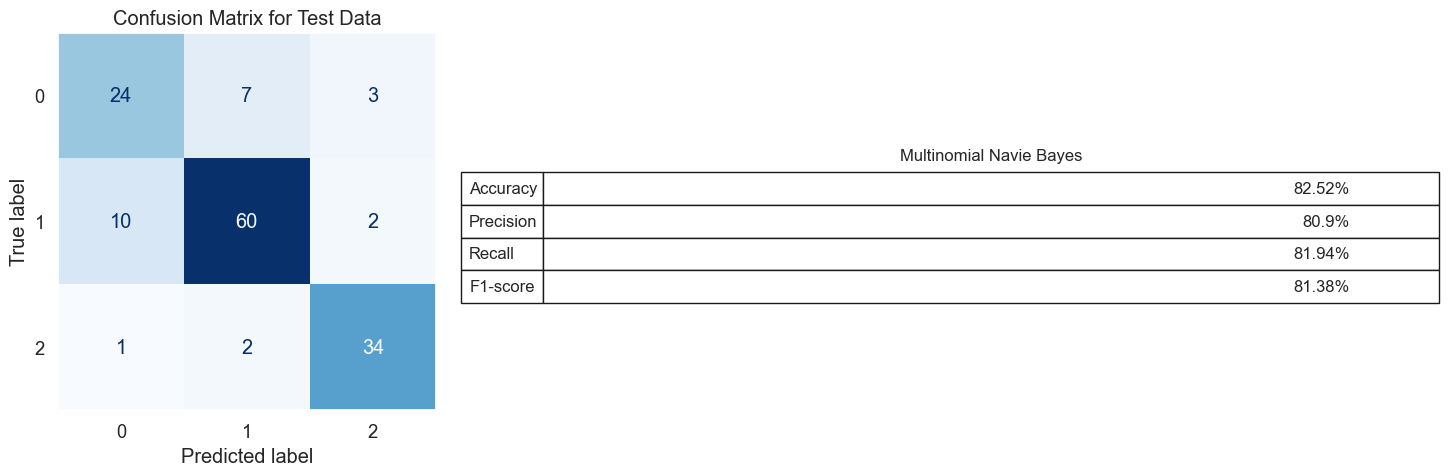

In [78]:
#Bag of Words model
X1_train_dense = X1_train.toarray()
X1_test_dense = X1_test.toarray()
mnb_bow_model = MultinomialNB(alpha=1.0)
mnb_bow_model.fit(X1_train_dense, y1_train)
model_evaluation(mnb_bow_model, X1_train_dense, X1_test_dense, y1_train, y1_test, "Multinomial Navie Bayes")


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       135
           1       0.98      1.00      0.99       288
           2       0.97      1.00      0.99       145

    accuracy                           0.98       568
   macro avg       0.98      0.98      0.98       568
weighted avg       0.98      0.98      0.98       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.59      0.70        34
           1       0.83      0.93      0.88        72
           2       0.90      0.95      0.92        37

    accuracy                           0.85       143
   macro avg       0.86      0.82      0.83       143
weighted avg       0.86      0.85      0.85       143



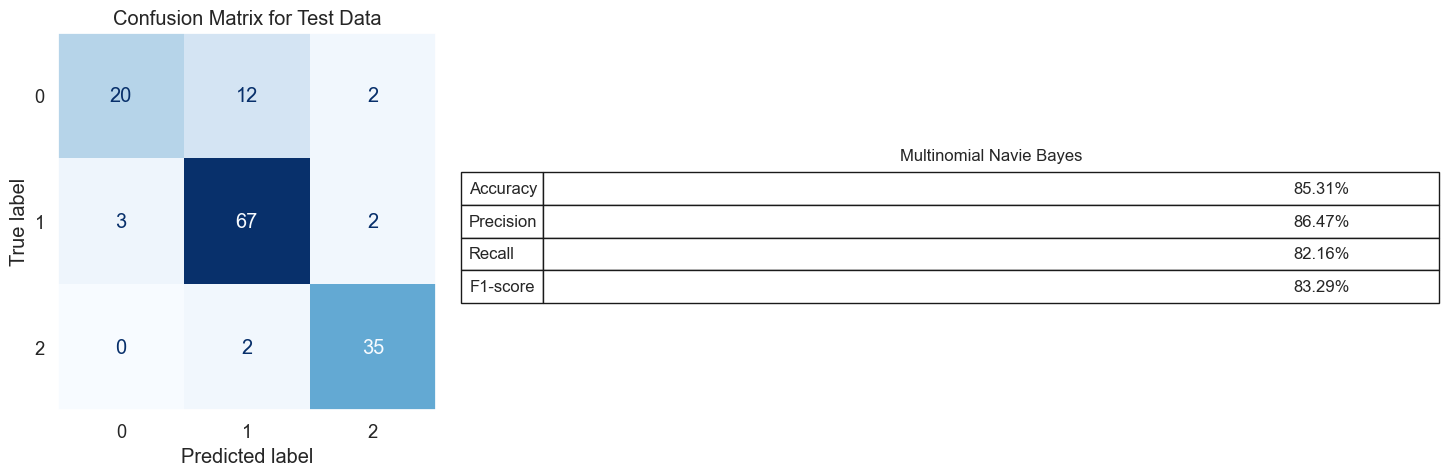

In [79]:
# Using TF-IDF
X2_train_dense = X2_train.toarray()
X2_test_dense = X2_test.toarray()
mnb_tfidf_model = MultinomialNB(alpha=0.3)
mnb_tfidf_model.fit(X2_train_dense, y2_train)
model_evaluation(mnb_tfidf_model, X2_train_dense, X2_test_dense, y2_train, y2_test, "Multinomial Navie Bayes")

# Decision Tree


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       288
           2       1.00      1.00      1.00       145

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        34
           1       0.73      0.92      0.81        72
           2       0.93      0.70      0.80        37

    accuracy                           0.76       143
   macro avg       0.77      0.70      0.72       143
weighted avg       0.76      0.76      0.75       143



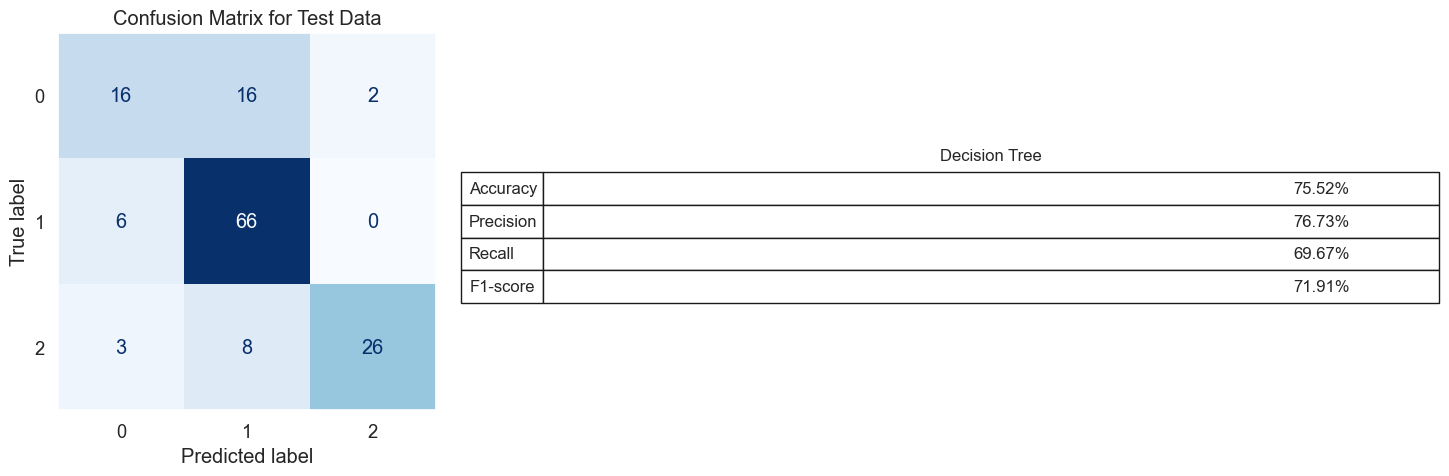

In [80]:
# Using Bag of Words
dt_bow_model = DecisionTreeClassifier()
dt_bow_model.fit(X1_train, y1_train)
model_evaluation(dt_bow_model, X1_train, X1_test, y1_train, y1_test, "Decision Tree")


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       288
           2       1.00      1.00      1.00       145

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.59      0.65        34
           1       0.75      0.86      0.80        72
           2       0.88      0.76      0.81        37

    accuracy                           0.77       143
   macro avg       0.78      0.74      0.75       143
weighted avg       0.77      0.77      0.77       143



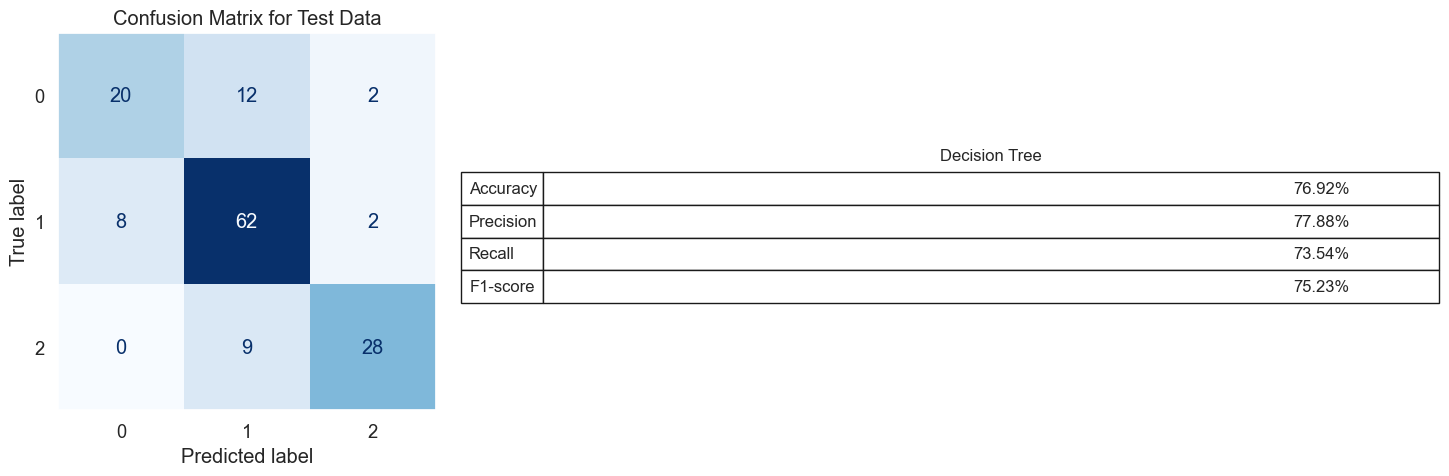

In [81]:
# Using TF-IDF
dt_tfidf_model = DecisionTreeClassifier()
dt_tfidf_model.fit(X2_train, y2_train)
model_evaluation(dt_tfidf_model, X2_train, X2_test, y2_train, y2_test, "Decision Tree")

# Random Forest Classifier


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       288
           2       1.00      1.00      1.00       145

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.50      0.65        34
           1       0.69      0.97      0.81        72
           2       0.96      0.62      0.75        37

    accuracy                           0.77       143
   macro avg       0.87      0.70      0.74       143
weighted avg       0.82      0.77      0.76       143



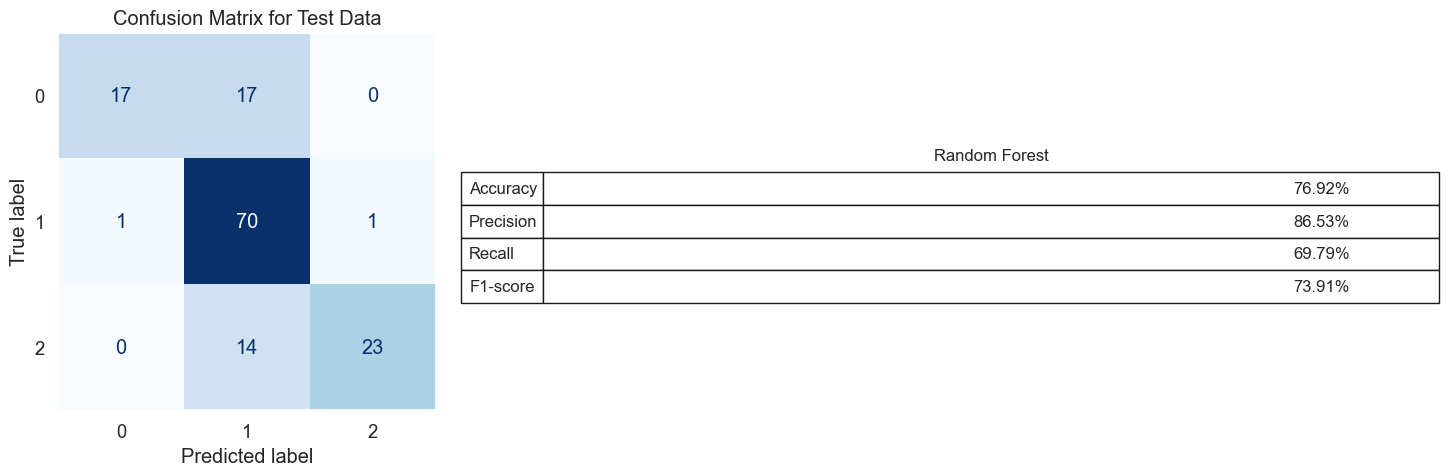

In [82]:
# Using Bag of Words
rf_bow_model = RandomForestClassifier(n_estimators = 100)
rf_bow_model.fit(X1_train, y1_train)
model_evaluation(rf_bow_model, X1_train, X1_test, y1_train, y1_test, "Random Forest")


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       288
           2       1.00      1.00      1.00       145

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.44      0.59        34
           1       0.66      0.96      0.78        72
           2       0.95      0.54      0.69        37

    accuracy                           0.73       143
   macro avg       0.83      0.65      0.69       143
weighted avg       0.79      0.73      0.71       143



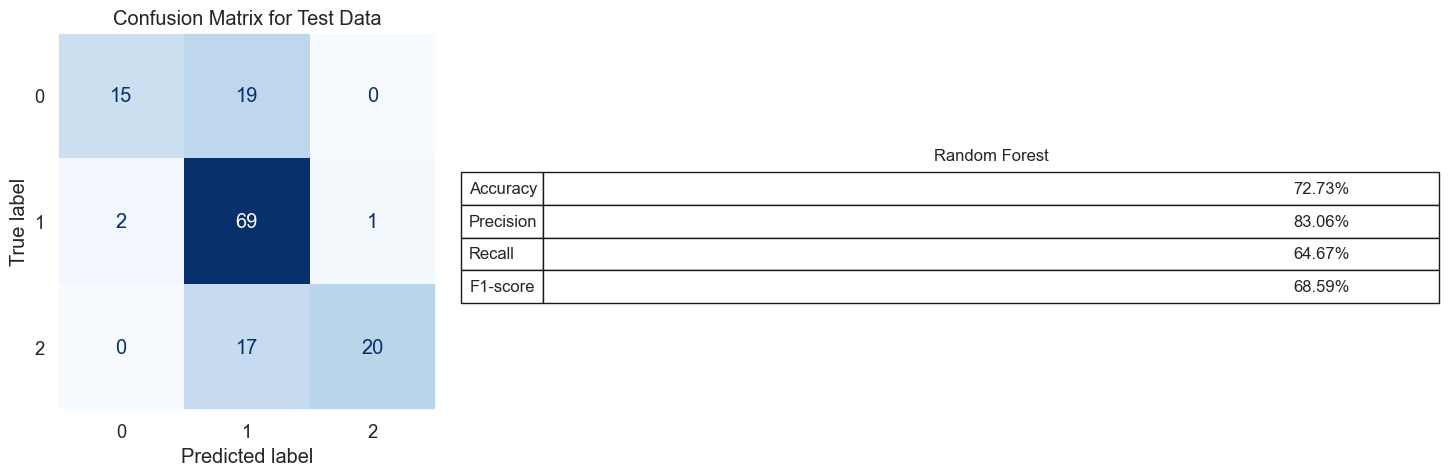

In [83]:
# Using TF-IDF
rf_tfidf_model = RandomForestClassifier(n_estimators = 100)
rf_tfidf_model.fit(X2_train, y2_train)
model_evaluation(rf_tfidf_model, X2_train, X2_test, y2_train, y2_test, "Random Forest")

# Support Vector Machine


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       288
           2       1.00      1.00      1.00       145

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        34
           1       0.83      0.90      0.87        72
           2       0.97      0.86      0.91        37

    accuracy                           0.84       143
   macro avg       0.84      0.81      0.83       143
weighted avg       0.84      0.84      0.84       143



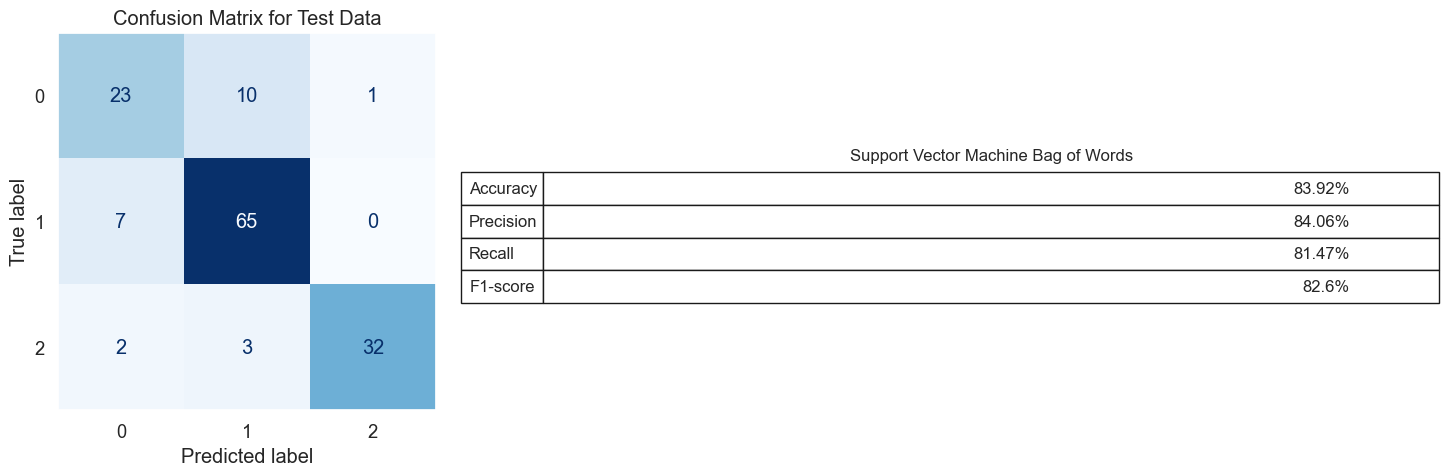

In [84]:
# Using Bag of Words
svm_bow_model = SVC(kernel='linear',random_state=0,decision_function_shape='ovr')
svm_bow_model.fit(X1_train, y1_train)
model_evaluation(svm_bow_model, X1_train, X1_test, y1_train, y1_test, "Support Vector Machine Bag of Words")


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       135
           1       0.97      1.00      0.99       288
           2       0.99      0.99      0.99       145

    accuracy                           0.98       568
   macro avg       0.99      0.98      0.98       568
weighted avg       0.98      0.98      0.98       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.53      0.68        34
           1       0.78      0.99      0.87        72
           2       0.97      0.86      0.91        37

    accuracy                           0.85       143
   macro avg       0.90      0.79      0.82       143
weighted avg       0.87      0.85      0.84       143



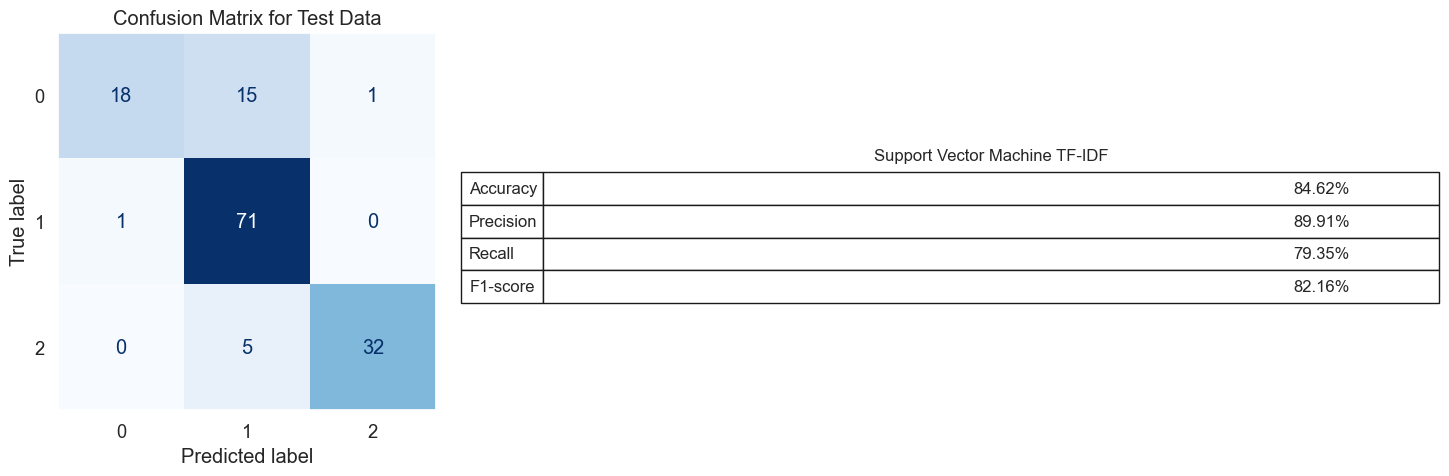

In [85]:
# Using TF-IDF
svm_tfidf_model = SVC(kernel='linear',random_state=0)
svm_tfidf_model.fit(X2_train, y2_train)
model_evaluation(svm_tfidf_model, X2_train, X2_test, y2_train, y2_test, "Support Vector Machine TF-IDF")

# Summary


In [86]:
# Function to get train and test accuracy in %
def get_accuracy(model, X_train, X_test, y_train, y_test):
    train_acc = accuracy_score(y_train, model.predict(X_train)) * 100
    test_acc = accuracy_score(y_test, model.predict(X_test)) * 100
    return {"Train Accuracy (%)": round(train_acc, 2), "Test Accuracy (%)": round(test_acc, 2)}

# ------------------- Bag of Words Models -------------------
bow_results = []

bow_results.append({"Model": "Logistic Regression BOW", **get_accuracy(lr_bow_model, X1_train, X1_test, y1_train, y1_test)})
bow_results.append({"Model": "KNN BOW", **get_accuracy(knn_bow_model, X1_train, X1_test, y1_train, y1_test)})
bow_results.append({"Model": "Multinomial NB BOW", **get_accuracy(mnb_bow_model, X1_train_dense, X1_test_dense, y1_train, y1_test)})
bow_results.append({"Model": "Decision Tree BOW", **get_accuracy(dt_bow_model, X1_train, X1_test, y1_train, y1_test)})
bow_results.append({"Model": "Random Forest BOW", **get_accuracy(rf_bow_model, X1_train, X1_test, y1_train, y1_test)})
bow_results.append({"Model": "SVM BOW", **get_accuracy(svm_bow_model, X1_train, X1_test, y1_train, y1_test)})

bow_df = pd.DataFrame(bow_results)
bow_df = bow_df.sort_values(by="Test Accuracy (%)", ascending=False).reset_index(drop=True)

# ------------------- TF-IDF Models -------------------
tfidf_results = []

tfidf_results.append({"Model": "Logistic Regression TFIDF", **get_accuracy(lr_tfidf_model, X2_train, X2_test, y2_train, y2_test)})
tfidf_results.append({"Model": "KNN TFIDF", **get_accuracy(knn_tfidf_model, X2_train, X2_test, y2_train, y2_test)})
tfidf_results.append({"Model": "Multinomial NB TFIDF", **get_accuracy(mnb_tfidf_model, X2_train_dense, X2_test_dense, y2_train, y2_test)})
tfidf_results.append({"Model": "Decision Tree TFIDF", **get_accuracy(dt_tfidf_model, X2_train, X2_test, y2_train, y2_test)})
tfidf_results.append({"Model": "Random Forest TFIDF", **get_accuracy(rf_tfidf_model, X2_train, X2_test, y2_train, y2_test)})
tfidf_results.append({"Model": "SVM TFIDF", **get_accuracy(svm_tfidf_model, X2_train, X2_test, y2_train, y2_test)})

tfidf_df = pd.DataFrame(tfidf_results)
tfidf_df = tfidf_df.sort_values(by="Test Accuracy (%)", ascending=False).reset_index(drop=True)

# Display tables
print("===============Bag of Words Models Accuracy (%)=============")
display(bow_df)

print("=================TF-IDF Models Accuracy (%)=================")
display(tfidf_df)


===============Bag of Words Models Accuracy (%)=============


,Model,Train Accuracy (%),Test Accuracy (%)
0,Logistic Regression BOW,100.00,85.31
1,SVM BOW,100.00,83.92
2,Multinomial NB BOW,97.36,82.52
3,KNN BOW,88.91,76.92
4,Random Forest BOW,100.00,76.92
5,Decision Tree BOW,100.00,75.52


=================TF-IDF Models Accuracy (%)=================


,Model,Train Accuracy (%),Test Accuracy (%)
0,Multinomial NB TFIDF,98.24,85.31
1,SVM TFIDF,98.24,84.62
2,KNN TFIDF,90.49,81.82
3,Logistic Regression TFIDF,94.54,77.62
4,Decision Tree TFIDF,100.00,76.92
5,Random Forest TFIDF,100.00,72.73


# Save trained models

In [87]:
joblib.dump(bow_vecto, 'trained_models/bow_vectorizer.joblib')
joblib.dump(knn_bow_model, "trained_models/knn_bow.joblib")
joblib.dump(svm_bow_model, "trained_models/svm_bow.joblib")
joblib.dump(rf_bow_model, "trained_models/rf_bow.joblib")
joblib.dump(dt_bow_model, "trained_models/dt_bow.joblib")
joblib.dump(mnb_bow_model, "trained_models/mnb_bow.joblib")
joblib.dump(lr_bow_model, "trained_models/lr_bow.joblib")

['trained_models/lr_bow.joblib']

In [88]:
joblib.dump(tf_idf_vecto, 'trained_models/tf_idf_vectorizer.joblib')
joblib.dump(knn_tfidf_model, "trained_models/knn_tf_idf.joblib")
joblib.dump(svm_tfidf_model, "trained_models/svm_tf_idf.joblib")
joblib.dump(rf_tfidf_model, "trained_models/rf_tf_idf.joblib")
joblib.dump(dt_tfidf_model, "trained_models/dt_tf_idf.joblib")
joblib.dump(mnb_tfidf_model, "trained_models/mnb_tf_idf.joblib")
joblib.dump(lr_tfidf_model, "trained_models/lr_tf_idf.joblib")


['trained_models/lr_tf_idf.joblib']

# Conclusion:

- From the results of the sentiment classification models, it is evident that Multinomial Naive Bayes and SVM consistently performed the best across both Bag of Words (BOW) and TF-IDF feature representations.
- Bag of Words: 
   1. Logistic Regression and SVM achieved the highest test accuracies, 85.31% and 83.92% respectively. 
   2. Multinomial Naive Bayes also performed well with 82.52% test accuracy. 
   3. Decision Tree and Random Forest, despite achieving perfect train accuracy, suffered from overfitting as reflected by lower test accuracies (72.03% and 76.22%).
- TF-IDF: 
  1. Multinomial Naive Bayes achieved the top test accuracy (85.31%), slightly outperforming SVM (84.62%).
  2.  KNN and Logistic Regression performed moderately, 
  3.  While Decision Tree and Random Forest showed significant overfitting, with train accuracies of 100% but much lower test accuracies (75.52% and 72.73%).
##### Overall Insights:
- Multinomial Naive Bayes and SVM are the most reliable models for this dataset.
- Bag of Words and TF-IDF representations both yielded similar top accuracies, but TF-IDF slightly improved the performance of Naive Bayes.
- Tree-based models (Decision Tree and Random Forest) tend to overfit, achieving high training accuracy but poor generalization.
- KNN showed moderate performance but lagged behind the top models in both representations.